In [32]:
import numpy as np
from scipy.stats import norm

In [33]:
#1 a.)
mean = 0.00012
sd = 0.023
vol = sd*np.sqrt(252)
mu = mean*252+(vol**2)/2

In [137]:
mu

0.096894

In [138]:
vol

0.3651136809269135

In [ ]:
#1 b.)

In [34]:
# Expected value for single stock GBM

def exp_gbm_single(a, mu, t, v0):
    
    exp_gbm = v0 * np.exp(mu * t)

    return exp_gbm

In [35]:
# Expected value for quad single stock GBM

def exp_gbm_quad_single(a, mu, t, v0, sigma):
    
    exp_gbm_quad = (v0**2) * np.exp((2 * mu + sigma**2) * t)
    
    return exp_gbm_quad

In [36]:
# SD single stock GBM

def sd_gbm_single(exp_gbm_1, exp_gbm_2):
    
    var_gbm = exp_gbm_2 - (exp_gbm_1)**2
    sd_gbm = np.sqrt(var_gbm)
    
    return sd_gbm

In [37]:
# VaR for log-normal distributed Stock prices

def VaR_normal(v0, exp_gbm, q, sd_gbm):
    
    quantile_norm = norm.ppf(q)
    
    var = v0 - (exp_gbm - quantile_norm * sd_gbm)
    
    return var

In [38]:
# p-VaR

def VaR_p(s0, mu, sigma, t, p):
    icdf = norm.ppf(1-p)
    v1 = sigma*(t**0.5)*icdf + (mu - (sigma**2)/2)*t
    v = s0-s0*np.exp(v1)
    return v

In [39]:
VaR_p(1200*36, mu, vol, 5/252, 0.99)

4848.354298446982

In [40]:
#2


In [41]:
# Expected value 2 stock GBM

def exp_gbm_two(a, b, s1_0, s2_0, mu1, mu2, t):
    
    v1 = a * s1_0 * np.exp(mu1 * t) + b * s2_0 * np.exp(mu2 * t)

    return v1

In [42]:
# Quad expected value 2 stock GBM

def exp_gbm_quad_two(a, b, s1_0, s2_0, mu1, mu2, t, sigma1, sigma2, rho):
    
    v2 = (a**2) * (s1_0**2) * np.exp((2 * mu1 + sigma1**2)*t) + (b**2) * (s2_0**2) * np.exp((2 * mu2 + sigma2**2)*t) + (2 * a * b) * (s1_0) * (s2_0) * np.exp((mu1 + mu2 + rho * sigma1 * sigma2)*t)
    
    return v2

In [43]:
a = 400
b = 250

s1_0 = 41
s2_0 = 71

mu1 = 3.2 / 100
mu2 = 2.5 / 100

sigma1 = 0.3
sigma2 = 0.2

rho = 0.25

t = 10 / 252

q = 0.99

v0 = 400*41 + 250*71

exp_gbm_2 = exp_gbm_two(a, b, s1_0, s2_0, mu1, mu2, t)
exp_gbm_quad_2 = exp_gbm_quad_two(a, b, s1_0, s2_0, mu1, mu2, t, sigma1, sigma2, rho)

sd_gbm_2 = sd_gbm_single(exp_gbm_2, exp_gbm_quad_2)
VaR_2 = VaR_normal(v0, exp_gbm_2, q, sd_gbm_2)
VaR_2

3094.4888915074407

In [44]:
#3
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [58]:
ba = pd.read_csv('BA-bloomberg.csv')
noc = pd.read_csv('NOC-bloomberg.csv')

In [59]:
ba = pd.read_csv('BA-bloomberg.csv')
noc = pd.read_csv('NOC-bloomberg.csv')

# transform string to datetime object, aufpassen mit den genauen definitionen der anteile: %m/%d/%Y -> Y für 2022, net 22
ba['Dates'] = [datetime.datetime.strptime(d, '%m/%d/%Y') for d in ba["Dates"]]
noc['Dates'] = [datetime.datetime.strptime(d, '%m/%d/%Y') for d in noc["Dates"]]

In [60]:
# generate log return col and square log return col
ba['log_ret'] = np.log(ba.PX_LAST) - np.log(ba.PX_LAST.shift(-1))
noc['log_ret'] = np.log(noc.PX_LAST) - np.log(noc.PX_LAST.shift(-1))

# generate square log returns
ba['log_ret_sq'] = ba['log_ret'].pow(2)
noc['log_ret_sq'] = noc['log_ret'].pow(2)

In [61]:
ba2 = ba

In [99]:
# l = 2 mu for BA data
#-> set index
#ba.set_index('Dates')
ba2 = ba2.sort_index()
ba2_mu = ba2.rolling('730d').mean().shift(1)



In [100]:
# Tabular for 2 year mu, 20 years
ba2_mean_filter = ba2_mu[ba2_mu.index > '2002-09-22']
ba2_mean_filter['log_ret']

(array([10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

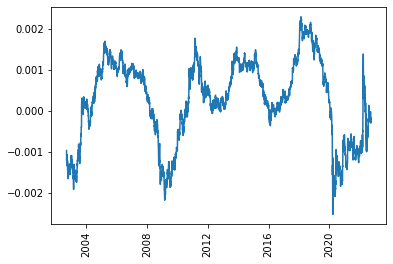

In [101]:
plt.plot(ba2_mean_filter['log_ret'])
plt.xticks(rotation = 90)



In [102]:
# l = 2 sigma for BA data
ba2_sigma = ba2.rolling('730d').std().shift(1)

In [103]:
# Tabular for 2 year sigma, 20 years
ba2_sigma_filter = ba2_sigma[ba2_sigma.index > '2002-09-22']
ba2_sigma_filter['log_ret']

(array([10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

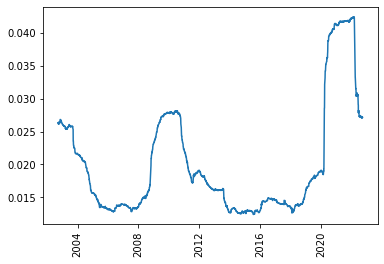

In [104]:
plt.plot(ba2_sigma_filter['log_ret'])
plt.xticks(rotation = 90)

In [105]:
# l = 5 mu for BA data
ba5_mu = ba2.rolling('1825d').mean().shift(1)
ba5_mean_filter = ba5_mu[ba5_mu.index > '2002-09-22']
# Tabular for 5 year mu, 20 years
ba5_mean_filter['log_ret']

(array([10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

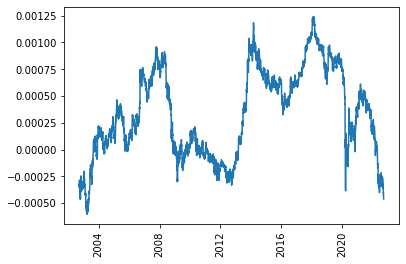

In [106]:
plt.plot(ba5_mean_filter['log_ret'])
plt.xticks(rotation = 90)

In [107]:
# l = 5 sigma for BA data
ba5_sigma = ba2.rolling('1825d').std().shift(1)
# Tabular for 5 year sigma, 20 years
ba5_sigma_filter = ba5_sigma[ba5_sigma.index > '2002-09-22']
ba5_sigma_filter['log_ret']

(array([10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

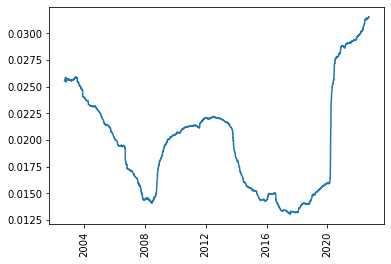

In [108]:
plt.plot(ba5_sigma_filter['log_ret'])
plt.xticks(rotation = 90)

In [109]:
# l = 10 mu for BA data
ba10_mu = ba2.rolling('3650d').mean().shift(1)
ba10_mean_filter = ba10_mu[ba10_mu.index > '2002-09-22']
# Tabular 10 year mu
ba10_mean_filter['log_ret']

(array([10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

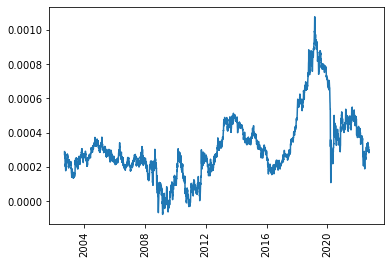

In [110]:
plt.plot(ba10_mean_filter['log_ret'])
plt.xticks(rotation = 90)

In [111]:
# l = 10 sigma for BA data
ba10_sigma = ba2.rolling('3650d').std().shift(1)
ba10_sigma_filter = ba10_sigma[ba10_sigma.index > '2002-09-22']
# tabular 10 year sigma
ba10_sigma_filter

(array([10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

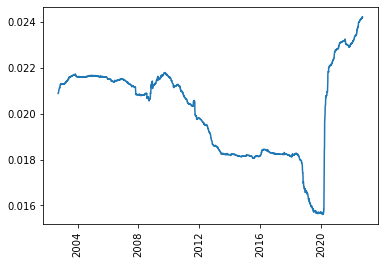

In [112]:
plt.plot(ba10_sigma_filter['log_ret'])
plt.xticks(rotation = 90)

In [128]:
noc2 = noc.set_index('Dates')
noc2 = noc2.sort_index()

In [129]:
noc2

,PX_OPEN,PX_HIGH,PX_LOW,PX_CLOSE_1D,PX_VOLUME,PX_LAST,log_ret,log_ret_sq
Dates,,,,,,,,
1985-09-30,21.319,21.319,21.035,21.319,115600,21.262,NaN,NaN
1985-10-01,21.262,21.716,21.149,21.262,139000,21.716,0.021128,4.463871e-04
1985-10-02,21.942,21.942,21.319,21.716,107600,21.375,-0.015827,2.505035e-04
1985-10-03,21.489,21.489,21.149,21.375,179800,21.205,-0.007985,6.376041e-05
1985-10-04,21.262,21.262,20.978,21.205,154600,20.978,-0.010763,1.158364e-04
...,...,...,...,...,...,...,...,...
2022-09-16,483.360,487.849,480.300,485.080,1115534,485.200,0.000247,6.118266e-08
2022-09-19,483.190,492.570,481.050,485.200,843016,488.070,0.005898,3.478241e-05
2022-09-20,488.060,496.080,481.030,488.070,875761,494.000,0.012077,1.458462e-04


(array([10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

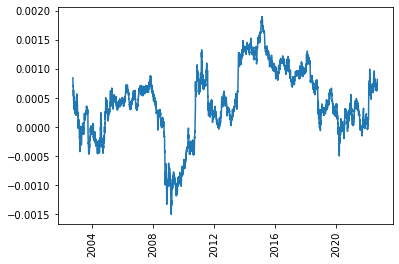

In [131]:
# l = 2 mu for NOC data
noc2_mu = noc2.rolling('730d').mean().shift(1)

noc2_mean_filter = noc2_mu[noc2_mu.index > '2002-09-22']

# 2 year mu tabular
print(noc2_mean_filter['log_ret'])
plt.plot(noc2_mean_filter['log_ret'])
plt.xticks(rotation = 90)

(array([10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

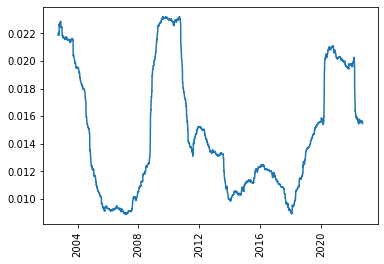

In [132]:
# l = 2 sigma for BA data
noc2_sigma = noc2.rolling('730d').std().shift(1)
noc2_sigma_filter = noc2_sigma[noc2_sigma.index > '2002-09-22']

# 2 year sigma tabular
print(noc2_sigma_filter['log_ret'])
plt.plot(noc2_sigma_filter['log_ret'])
plt.xticks(rotation = 90)

(array([10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

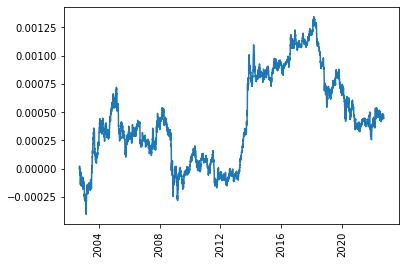

In [133]:
# l = 5 mu for NOC data
noc5_mu = noc2.rolling('1825d').mean().shift(1)

noc5_mean_filter = noc5_mu[noc5_mu.index > '2002-09-22']

# 5 year mu tabular
print(noc5_mean_filter['log_ret'])
plt.plot(noc5_mean_filter['log_ret'])
plt.xticks(rotation = 90)


(array([10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

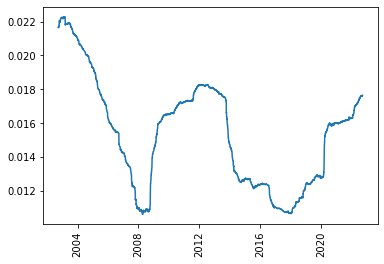

In [134]:
# l = 5 sigma for BA data
noc5_sigma = noc2.rolling('1825d').std().shift(1)
noc5_sigma_filter = noc5_sigma[noc5_sigma.index > '2002-09-22']

# 5 year sigma tabular
print(noc5_sigma_filter['log_ret'])
plt.plot(noc5_sigma_filter['log_ret'])
plt.xticks(rotation = 90)

(array([10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

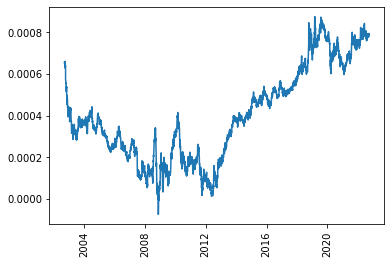

In [135]:
# l = 10 mu for NOC data
noc10_mu = noc2.rolling('3650d').mean().shift(1)

noc10_mean_filter = noc10_mu[noc10_mu.index > '2002-09-22']

# 10 year mean tabular
print(noc10_mean_filter['log_ret'])
plt.plot(noc10_mean_filter['log_ret'])
plt.xticks(rotation = 90)

(array([10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

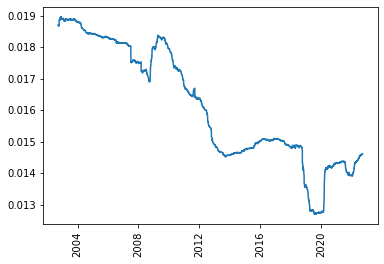

In [136]:
# l = 10 sigma for BA data
noc10_sigma = noc2.rolling('3650d').std().shift(1)
noc10_sigma_filter = noc10_sigma[noc10_sigma.index > '2002-09-22']

# 10 year sigma tabular
print(noc10_sigma_filter['log_ret'])

plt.plot(noc10_sigma_filter['log_ret'])
plt.xticks(rotation = 90)

The computed parameters are comparable over time because we assume GBM for all stocks and the log returns are drawn from the same distribution. Here we can infer that it does not matter which time window we consider, because the distribution where the log returns come from are the same and therefore their approximations for mu and sigma. 

For sigma, the variation over time is not consistent (since different time windows are considered for all sigmas), but the range in which sigma varies over time remains constant for all l over the period.

For mu, both the course within the period under consideration and the bandwidth look less constant. 

In [113]:
###### 4
lambda1 = 0.97
rolling_exponential_mean = ba2.ewm(alpha = 1-lambda1).mean().shift(1)
rolling_exponential_std = ba2.ewm(alpha = 1-lambda1).std().shift(1)

<AxesSubplot:xlabel='Dates'>

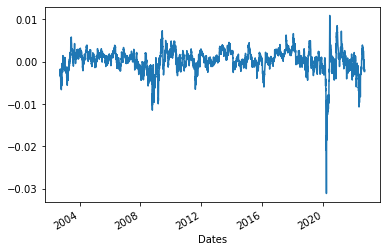

In [117]:
# mean for exponential weighting 20 years, lambda1
rolling_exponential_mean[rolling_exponential_mean.index > "2002-09-22"]["log_ret"].plot()

In [140]:
# lambda1 expo weight mu
rolling_exponential_mean[rolling_exponential_mean.index > "2002-09-22"]["log_ret"]

Dates
2002-09-23   -0.002115
2002-09-24   -0.002953
2002-09-25   -0.003240
2002-09-26   -0.002759
2002-09-27   -0.001726
                ...   
2022-09-16   -0.001220
2022-09-19   -0.002303
2022-09-20   -0.002112
2022-09-21   -0.001830
2022-09-22   -0.002325
Name: log_ret, Length: 5036, dtype: float64

<AxesSubplot:xlabel='Dates'>

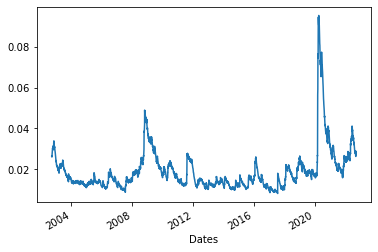

In [118]:
# sd for exponential weighting 20 years, lambda1
rolling_exponential_std[rolling_exponential_std.index > "2002-09-22"]["log_ret"].plot()

In [141]:
# lambda1 sigma expo weightening
rolling_exponential_std[rolling_exponential_std.index > "2002-09-22"]["log_ret"]

Dates
2002-09-23    0.026409
2002-09-24    0.026450
2002-09-25    0.026102
2002-09-26    0.025854
2002-09-27    0.026143
                ...   
2022-09-16    0.028064
2022-09-19    0.028329
2022-09-20    0.027922
2022-09-21    0.027547
2022-09-22    0.027279
Name: log_ret, Length: 5036, dtype: float64

In [119]:
lambda2 = 0.94
rolling_exponential_mean_2 = ba2.ewm(alpha = 1-lambda2).mean().shift(1)
rolling_exponential_std_2 = ba2.ewm(alpha = 1-lambda2).std().shift(1)

<AxesSubplot:xlabel='Dates'>

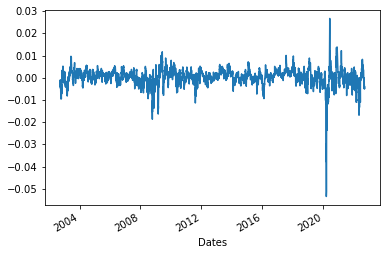

In [120]:
# mean for exponential weighting 20 years, lambda2
rolling_exponential_mean_2[rolling_exponential_mean_2.index > "2002-09-22"]["log_ret"].plot()

In [142]:
# lambda2 mu expo weight
rolling_exponential_mean_2[rolling_exponential_mean_2.index > "2002-09-22"]["log_ret"]

Dates
2002-09-23   -0.001835
2002-09-24   -0.003528
2002-09-25   -0.004067
2002-09-26   -0.003056
2002-09-27   -0.000971
                ...   
2022-09-16   -0.003064
2022-09-19   -0.005120
2022-09-20   -0.004568
2022-09-21   -0.003857
2022-09-22   -0.004725
Name: log_ret, Length: 5036, dtype: float64

<AxesSubplot:xlabel='Dates'>

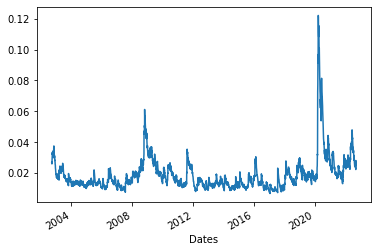

In [121]:
# sd for exponential weighting 20 years, lambda2
rolling_exponential_std_2[rolling_exponential_std_2.index > "2002-09-22"]["log_ret"].plot()

In [143]:
# lambda2 sd expo weight
rolling_exponential_std_2[rolling_exponential_std_2.index > "2002-09-22"]["log_ret"]

Dates
2002-09-23    0.026920
2002-09-24    0.026973
2002-09-25    0.026241
2002-09-26    0.025764
2002-09-27    0.026348
                ...   
2022-09-16    0.026680
2022-09-19    0.027157
2022-09-20    0.026423
2022-09-21    0.025777
2022-09-22    0.025235
Name: log_ret, Length: 5036, dtype: float64